### 데이터 수집 및 전처리
* 원하는 데이터를 웹에서 수집할 수 있다고 해도 그걸 바로 사용하긴 힘들것
* 왜냐하면 바로 활용하기는 지저분할 수 있기 때문
* 그래서 전처리가 필요

In [52]:
# 서버와 요청을 주고 받는 걸 해줄 수 있는 라이브러리 --> requests
import requests
import time # 시간차를 위한 모듈 (지나치게 빠른 속도로 수집을 하면 서버에서 로봇으로 인식할 가능성 있기 때문)

In [2]:
# 네이버 메인 페이지로 요청
naver_url = 'https://www.naver.com/'
naver_response = requests.get(naver_url)

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
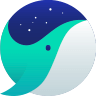
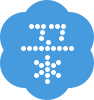

In [3]:
# 이를 문자열로 보자 --> text
naver_response.text

* 그럼 이 중에서 우리가 원하는 부분만 뽑으려면... "BeautifulSoup"

In [4]:
import bs4

naver_bs = bs4.BeautifulSoup(naver_response.text,'lxml') # 대부분 웹에서 requests로 가져오는 데이터는 lxml 옵션으로 입력하면 됨

In [5]:
# find와 find_all 사용
naver_bs.find('span',class_='ah_k')

In [6]:
# find로 찾은 결과에서 내용만 보기
result = naver_bs.find('div',class_='group_nav') # span 태그에 있고, span 태그는 class 속성이 있고, 해당 속성값은 ah_k
result.text

'\n\n\n메일\n\n카페\n블로그\n지식iN\n쇼핑\nPay\n\nTV\n\n\n\n사전\n뉴스\n증권\n부동산\n지도\n영화\nVIBE\n책\n웹툰\n\n\n더보기\n\n서비스 전체보기\n메뉴설정\n초기화\n저장\n\n'

In [7]:
# find_all로 원하는 내용 모두 찾기
naver_bs.find_all('div',class_='group_nav')

[<div class="group_nav">
 <ul class="list_nav type_fix">
 <li class="nav_item">
 <a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
 </li>
 <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
 <li class="nav_item">
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
 </li>
 </ul>
 <ul class="list_nav NM_FAVORITE_LIST">
 <li class="nav_item"><a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a></li>
 <li clas

In [8]:
# find_all 결과에서 내용만 가져오기
result_list = naver_bs.find_all('div',class_='group_nav')
for div in result_list:
    print(div.text)




메일

카페
블로그
지식iN
쇼핑
Pay

TV



사전
뉴스
증권
부동산
지도
영화
VIBE
책
웹툰


더보기

서비스 전체보기
메뉴설정
초기화
저장




#### 재무데이터 구해오기
* company guide 활용 (ref: https://comp.fnguide.com/svo2/asp/SVD_Main.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701)

* company guide의 url을 통해 알 수 있는 것 --> 종목번호만 바꿔주면 각 종목별 정보창으로 접근할 수 있음

In [9]:
# pandas를 통해 재무제표 페이지에서 테이블들 찾아오기
import pandas as pd

fs_url = "https://comp.fnguide.com/svo2/asp/SVD_Finance.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
fs_page = requests.get(fs_url)
fs_tables = pd.read_html(fs_page.text)
fs_tables

[                              IFRS(연결)    2017/12    2018/12    2019/12  \
 0                                  매출액  2395754.0  2437714.0  2304009.0   
 1                                 매출원가  1292907.0  1323944.0  1472395.0   
 2                                매출총이익  1102847.0  1113770.0   831613.0   
 3                판매비와관리비계산에 참여한 계정 펼치기   566397.0   524903.0   553928.0   
 4                                 영업이익   536450.0   588867.0   277685.0   
 5                           영업이익(발표기준)   536450.0   588867.0   277685.0   
 6                   금융수익계산에 참여한 계정 펼치기    97374.0    99993.0   101616.0   
 7                   금융원가계산에 참여한 계정 펼치기    89789.0    86089.0    82749.0   
 8                   기타수익계산에 참여한 계정 펼치기    30107.0    14850.0    17787.0   
 9                   기타비용계산에 참여한 계정 펼치기    14196.0    11420.0    14147.0   
 10  종속기업,공동지배기업및관계기업관련손익계산에 참여한 계정 펼치기     2014.0     5398.0     4130.0   
 11                            세전계속사업이익   561960.0   611600.0   304322.0   
 12         

In [10]:
# 포관손익계산서(연간)만 불러오기
fs_tables[0]

,IFRS(연결),2017/12,2018/12,2019/12,2020/09,전년동기,전년동기(%)
0,매출액,2395754.0,2437714.0,2304009.0,1752555.0,1705161.0,2.8
1,매출원가,1292907.0,1323944.0,1472395.0,1066834.0,1086850.0,-1.8
2,매출총이익,1102847.0,1113770.0,831613.0,685721.0,618311.0,10.9
3,판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0,412229.0,1.0
4,영업이익,536450.0,588867.0,277685.0,269469.0,206082.0,30.8
5,영업이익(발표기준),536450.0,588867.0,277685.0,269469.0,206082.0,30.8
6,금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0,78645.0,0.3
7,금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0,63161.0,12.1
8,기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0,11789.0,-6.6
9,기타비용계산에 참여한 계정 펼치기,14196.0,11420.0,14147.0,18618.0,8752.0,112.7


In [11]:
# 데이터 전처리
temp_df = fs_tables[0]
temp_df = temp_df.set_index('IFRS(연결)')
temp_df = temp_df[["2017/12",	"2018/12",	"2019/12", "2020/09"]] # 전년동기 부분은 제거
temp_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
매출원가,1292907.0,1323944.0,1472395.0,1066834.0
매출총이익,1102847.0,1113770.0,831613.0,685721.0
판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0
영업이익,536450.0,588867.0,277685.0,269469.0
영업이익(발표기준),536450.0,588867.0,277685.0,269469.0
금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0
금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0
기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0


In [12]:
# 사용할 행만 남기기
temp_df = temp_df.loc[['매출액','영업이익','당기순이익']]
temp_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
영업이익,536450.0,588867.0,277685.0,269469.0
당기순이익,421867.0,443449.0,217389.0,198007.0


In [13]:
# 재무상태표와 현금흐름표도 마찬가지로 필요한 것들만 데이터프레임으로 정리
temp_df2 = fs_tables[2]
temp_df2 = temp_df2.set_index('IFRS(연결)')
temp_df2 = temp_df2.loc[["자산","부채","자본"]]

temp_df3 = fs_tables[4]
temp_df3 = temp_df3.set_index('IFRS(연결)')
temp_df3 = temp_df3.loc[["영업활동으로인한현금흐름"]]

In [14]:
temp_df2

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
자산,3017521.0,3393572.0,3525645.0,3757887.0
부채,872607.0,916041.0,896841.0,996526.0
자본,2144914.0,2477532.0,2628804.0,2761362.0


In [15]:
temp_df3

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
영업활동으로인한현금흐름,621620.0,670319.0,453829.0,407724.0


In [16]:
# 재무제표 페이지의 데이터프레임 이어 붙이기
fs_df = pd.concat([temp_df,temp_df2,temp_df3])
fs_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
영업이익,536450.0,588867.0,277685.0,269469.0
당기순이익,421867.0,443449.0,217389.0,198007.0
자산,3017521.0,3393572.0,3525645.0,3757887.0
부채,872607.0,916041.0,896841.0,996526.0
자본,2144914.0,2477532.0,2628804.0,2761362.0
영업활동으로인한현금흐름,621620.0,670319.0,453829.0,407724.0


In [17]:
# 삼성전자뿐만 아니라 다른 회사 데이터 수집용으로 일반화
def make_fs_dataframe(firm_code):
    fs_url = "https://comp.fnguide.com/svo2/asp/SVD_Finance.asp?pGB=1&gicode=" + firm_code + \
    "&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
    fs_page = requests.get(fs_url)
    fs_tables = pd.read_html(fs_page.text)
    
    # 포괄손익계산서
    temp_df = fs_tables[0]
    temp_df = temp_df.set_index(temp_df.columns[0]) # 앞서는 'IFRS(연결)'로 지정했지만 "GAAP"인 회사도 있기 때문에 첫 번째 칼럼으로 지정
    temp_df = temp_df[temp_df.columns[:4]] # 앞서는 연도를 따로 지정했지만 안정적인 일반화를 위해 칼럼 순서로 지정
    temp_df = temp_df.loc[['매출액','영업이익','당기순이익']]
    # 재무상태표
    temp_df2 = fs_tables[2]
    temp_df2 = temp_df2.set_index(temp_df2.columns[0])
    temp_df2 = temp_df2.loc[['자산','부채','자본']]
    # 현금흐름표
    temp_df3 = fs_tables[4]
    temp_df3 = temp_df3.set_index(temp_df3.columns[0])
    temp_df3 = temp_df3.loc[['영업활동으로인한현금흐름']]
    
    fs_df = pd.concat([temp_df,temp_df2,temp_df3])
    
    return fs_df

In [18]:
# 함수를 시험 --> 카카오(A035720) 재무제표 불러오기
firm_code = 'A035720'
make_fs_dataframe(firm_code)

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,19723.0,24170.0,30701.0,29217.0
영업이익,1654.0,729.0,2068.0,3062.0
당기순이익,1251.0,159.0,-3419.0,3688.0
자산,63494.0,79595.0,87373.0,112326.0
부채,18865.0,23324.0,29971.0,37628.0
자본,44629.0,56272.0,57401.0,74698.0
영업활동으로인한현금흐름,3719.0,4915.0,7527.0,6688.0


* 회사명을 행으로 지정하여 시기별로 재무제표를 관리하면 더 효율적일 것

In [19]:
firm_code = 'A035720'
fs_df = make_fs_dataframe(firm_code)
temp_df = pd.DataFrame({firm_code: fs_df['2017/12']})
temp_df = temp_df.T
temp_df.columns = [['2017/12']*len(fs_df),temp_df.columns] # 날짜는 칼럼의 길이만큼 반복, 그리고 기존의 칼럼 추가

In [20]:
temp_df

2017/12                                                        
IFRS(연결)      매출액    영업이익   당기순이익       자산       부채       자본 영업활동으로인한현금흐름
A035720   19723.0  1654.0  1251.0  63494.0  18865.0  44629.0       3719.0

In [21]:
# 시기별로 한 줄로 쭉 나타내보자
firm_code = 'A035720'
fs_df = make_fs_dataframe(firm_code)

for num, col in enumerate(fs_df.columns):
    temp_df = pd.DataFrame({firm_code: fs_df[col]})
    temp_df = temp_df.T
    temp_df.columns = [[col]*len(fs_df),temp_df.columns]
    if num==0:
        total_df = temp_df
    else:
        total_df = pd.merge(total_df, temp_df, how='outer', left_index = True, right_index = True)
total_df

2017/12                                                          \
IFRS(연결)      매출액    영업이익   당기순이익       자산       부채       자본 영업활동으로인한현금흐름   
A035720   19723.0  1654.0  1251.0  63494.0  18865.0  44629.0       3719.0   

          2018/12                ...  2019/12                        2020/09  \
IFRS(연결)      매출액   영업이익  당기순이익  ...       부채       자본 영업활동으로인한현금흐름      매출액   
A035720   24170.0  729.0  159.0  ...  29971.0  57401.0       7527.0  29217.0   

                                                                   
IFRS(연결)    영업이익   당기순이익        자산       부채       자본 영업활동으로인한현금흐름  
A035720   3062.0  3688.0  112326.0  37628.0  74698.0       6688.0  

[1 rows x 28 columns]

In [22]:
# 데이터프레임 형태바꾸기 함수화
def change_df(firm_code,dataframe):
    for num, col in enumerate(fs_df.columns):
        temp_df = pd.DataFrame({firm_code: dataframe[col]})
        temp_df = temp_df.T
        temp_df.columns = [[col]*len(dataframe),temp_df.columns]
        if num == 0:
            total_df = temp_df
        else:
            total_df = pd.merge(total_df, temp_df, how='outer', left_index = True, right_index = True)
    
    return total_df

In [23]:
# 4개 회사의 재무제표 데이터 가져와서 합치기
firmcode_list = ['A005930','A018260','A000660','A326030'] # 삼성전자, 삼성에스디에스, SK하이닉스, SK바이오팜

for num, code in enumerate(firmcode_list):
    fs_df = make_fs_dataframe(code)
    fs_df_changed = change_df(code, fs_df)
    if num==0:
        total_fs = fs_df_changed
    else:
        total_fs = pd.concat([total_fs,fs_df_changed])

total_fs

2017/12                                                      \
IFRS(연결)        매출액      영업이익     당기순이익         자산        부채         자본   
A005930   2395754.0  536450.0  421867.0  3017521.0  872607.0  2144914.0   
A018260     92992.0    7316.0    5418.0    72778.0   15583.0    57194.0   
A000660    301094.0  137213.0  106422.0   454185.0  115975.0   338209.0   
A326030         NaN    -989.0    -976.0      984.0     511.0      472.0   

                         2018/12                      ...   2019/12  \
IFRS(연결) 영업활동으로인한현금흐름        매출액      영업이익     당기순이익  ...        부채   
A005930      621620.0  2437714.0  588867.0  443449.0  ...  896841.0   
A018260        8348.0   100342.0    8774.0    6388.0  ...   22961.0   
A000660      146906.0   404451.0  208438.0  155400.0  ...  168463.0   
A326030        -983.0       11.0   -1391.0   -1381.0  ...    1521.0   

                                    2020/09                                 \
IFRS(연결)         자본 영업활동으로인한현금흐름        매출액      영업이익     당기순이익         자산   
A005930   2628804.0     453829.0  1752555.0  269469.0  198007.0  3757887.0   
A018260     67252.0       8938.0    79709.0    5878.0    2765.0    92083.0   
A000660    479432.0      64832.0   239342.0   40467.0   29912.0   692672.0   
A326030      -130.0       -813.0       99.0   -1860.0   -1893.0     5608.0   

                                            
IFRS(연결)        부채         자본 영업활동으로인한현금흐름  
A005930   996526.0  2761362.0     407724.0  
A018260    24076.0    68007.0       6768.0  
A000660   187681.0   504991.0      90527.0  
A326030     1180.0     4427.0      -1999.0  

[4 rows x 28 columns]

* 재무비율 정보도 똑같은 방법으로 정리

In [24]:
firm_code = 'A005930'
fr_url = "https://comp.fnguide.com/svo2/asp/SVD_FinanceRatio.asp?pGB=1&gicode="\
+ firm_code + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701"
fr_page = requests.get(fr_url)
fr_tables = pd.read_html(fr_page.text)
fr_tables[0]

,IFRS(연결),2016/12,2017/12,2018/12,2019/12,2020/09
0,안정성비율,안정성비율,안정성비율,안정성비율,안정성비율,안정성비율
1,유동비율계산에 참여한 계정 펼치기,258.5,218.8,252.9,284.4,278.8
2,당좌비율계산에 참여한 계정 펼치기,225.0,181.6,210.9,242.4,234.4
3,부채비율계산에 참여한 계정 펼치기,35.9,40.7,37.0,34.1,36.1
4,유보율계산에 참여한 계정 펼치기,21757.6,23681.4,26648.2,28302.4,29753.8
5,순차입금비율계산에 참여한 계정 펼치기,NaN,NaN,NaN,NaN,NaN
6,이자보상배율계산에 참여한 계정 펼치기,49.7,81.9,87.3,40.5,79.0
7,자기자본비율계산에 참여한 계정 펼치기,73.6,71.1,73.0,74.6,73.5
8,성장성비율,성장성비율,성장성비율,성장성비율,성장성비율,성장성비율
9,매출액증가율계산에 참여한 계정 펼치기,0.6,18.7,1.8,-5.5,2.8


In [25]:
def make_fr_dataframe(firm_code):
    fr_url = "https://comp.fnguide.com/svo2/asp/SVD_FinanceRatio.asp?pGB=1&gicode="\
    + firm_code + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701"
    fr_page = requests.get(fr_url)
    fr_tables = pd.read_html(fr_page.text)
    
    temp_df = fr_tables[0]
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['유동비율계산에 참여한 계정 펼치기','부채비율계산에 참여한 계정 펼치기','영업이익률계산에 참여한 계정 펼치기',
                          'ROA계산에 참여한 계정 펼치기','ROIC계산에 참여한 계정 펼치기']]
    temp_df.index = ['유동비율','부채비율','영업이익률','ROA','ROIC']
    
    return temp_df

In [26]:
firm_code = 'A005930'
make_fr_dataframe(firm_code)

,2016/12,2017/12,2018/12,2019/12,2020/09
유동비율,258.5,218.8,252.9,284.4,278.8
부채비율,35.9,40.7,37.0,34.1,36.1
영업이익률,14.5,22.4,24.2,12.1,15.4
ROA,9.0,15.0,13.8,6.3,7.3
ROIC,20.3,33.2,30.4,13.2,16.7


In [27]:
# 재무제표와 마찬가지로 재무비율 데이터도 4개 회사의 것을 합쳐보자
firmcode_list = ['A005930','A018260','A000660','A326030']

for num, code in enumerate(firmcode_list):
    fr_df = make_fr_dataframe(code)
    fr_df_changed = change_df(code,fr_df)
    if num==0:
        total_fr = fr_df_changed
    else:
        total_fr = pd.concat([total_fr,fr_df_changed])
        
total_fr

2017/12                           2018/12                          \
           유동비율   부채비율 영업이익률    ROA  ROIC    유동비율  부채비율     영업이익률     ROA   
A005930   218.8   40.7  22.4   15.0  33.2   252.9  37.0      24.2    13.8   
A018260   386.3   27.3   7.9    7.7  19.0   373.5  30.3       8.7     8.4   
A000660   213.3   34.3  45.6   27.4  41.0   152.7  35.9      51.5    28.5   
A326030   174.2  108.2   NaN  -66.8   NaN   263.3  63.0  -12660.3  -142.4   

              2019/12                           2020/09                        \
         ROIC    유동비율  부채비율  영업이익률    ROA  ROIC    유동비율  부채비율    영업이익률    ROA   
A005930  30.4   284.4  34.1   12.1    6.3  13.2   278.8  36.1     15.4    7.3   
A018260  22.8   375.9  34.1    9.2    8.8  25.8   359.7  35.4      7.4    4.0   
A000660  44.6   183.6  35.1   10.1    3.1   5.0   192.5  37.2     16.9    6.0   
A326030   NaN    67.8  완전잠식  -64.0  -61.0   NaN   508.8  26.7  -1875.6  -72.1   

                 
           ROIC  
A005930    16.7  
A018260    11.1  
A000660     7.8  
A326030  -800.7

* 다음은 투자지표 데이터도 똑같이 가져와서 수정

In [28]:
firm_code = 'A005930'
invest_url = 'https://comp.fnguide.com/svo2/asp/SVD_Invest.asp?pGB=1&gicode='\
+ firm_code + '&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701'
invest_page = requests.get(invest_url)
invest_tables = pd.read_html(invest_page.text)
temp_df = invest_tables[1]
temp_df

,IFRS 연결,2016/12,2017/12,2018/12,2019/12,2020/09
0,Per Share,Per Share,Per Share,Per Share,Per Share,Per Share
1,EPS계산에 참여한 계정 펼치기(원),2735,5421,6024,3166,2892
2,EBITDAPS계산에 참여한 계정 펼치기(원),6095,9934,11717,8445,7273
3,CFPS계산에 참여한 계정 펼치기(원),5263,8321,9659,7523,6199
4,SPS계산에 참여한 계정 펼치기(원),24632,31414,33458,33919,25801
5,BPS계산에 참여한 계정 펼치기(원),24340,28971,35342,37528,39446
6,Dividends,Dividends,Dividends,Dividends,Dividends,Dividends
7,"DPS(보통주,현금)(원)계산에 참여한 계정 펼치기",570,850,1416,1416,1062
8,"DPS(1우선주,현금)(원)계산에 참여한 계정 펼치기",571,851,1417,1417,1062
9,배당성향(현금)(%)계산에 참여한 계정 펼치기,17.81,14.09,21.92,44.73,NaN


In [29]:
# 투자지표 데이터프레임을 만드는 코드 함수화
def make_invest_dataframe(firm_code):
    invest_url = 'https://comp.fnguide.com/svo2/asp/SVD_Invest.asp?pGB=1&gicode='\
    + firm_code + '&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701'
    invest_page = requests.get(invest_url)
    invest_tables = pd.read_html(invest_page.text)
    temp_df = invest_tables[1]
    
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['PER계산에 참여한 계정 펼치기','PCR계산에 참여한 계정 펼치기','PSR계산에 참여한 계정 펼치기',
                           'PBR계산에 참여한 계정 펼치기','총현금흐름']]
    temp_df.index = ['PER','PCR','PSR','PBR','총현금흐름']
    
    return temp_df

In [30]:
# 4개 회사의 투자지표 합쳐보기
firmcode_list = ['A005930','A018260','A000660','A326030']

for num, code in enumerate(firmcode_list):
    invest_df = make_invest_dataframe(code)
    invest_df_changed = change_df(code,invest_df)
    if num==0:
        total_invest = invest_df_changed
    else:
        total_invest = pd.concat([total_invest,invest_df_changed])
        
total_invest

2017/12                            2018/12                             \
            PER    PCR   PSR   PBR   총현금흐름     PER    PCR   PSR   PBR   총현금흐름   
A005930    9.40   6.12  1.62  1.76  623891    6.42   4.01  1.16  1.10  691786   
A018260   29.18  17.93  1.66  2.78    8597   25.08  16.83  1.57  2.64    8942   
A000660    5.23   3.55  1.85  1.61  158916    2.83   2.00  1.09  0.89  216062   
A326030     NaN    NaN   NaN   NaN    -964     NaN    NaN   NaN   NaN   -1364   

        2019/12                            2020/09                           
            PER    PCR   PSR   PBR   총현금흐름     PER  PCR  PSR    PBR   총현금흐름  
A005930   17.63   7.42  1.65  1.49  494337     NaN  NaN  NaN   1.48  419535  
A018260   20.44  12.77  1.40  2.30   11594     NaN  NaN  NaN   1.98    5940  
A000660   34.03   6.48  2.54  1.36  107927     NaN  NaN  NaN   1.15  102029  
A326030     NaN    NaN   NaN   NaN    -606     NaN  NaN  NaN  27.68   -1790

#### 전 종목 코드 구해오기
* 한국거래소에서 수집 (ref: http://www.krx.co.kr/main/main.jsp)
* 엑셀 혹은 CSV 형태로 다운로드 가능

In [31]:
# 엑셀 파일 불러오기
path = r'...\krx_data.xlsx'
code_data = pd.read_excel(path)
code_data = code_data[['표준코드','단축코드','한글 종목약명']]
code_data

,표준코드,단축코드,한글 종목약명
0,KR7098120009,098120,마이크로컨텍솔
1,KR7131100000,131100,스카이이앤엠
2,KR7009520008,009520,포스코엠텍
3,KR7095570008,095570,AJ네트웍스
4,KR7006840003,006840,AK홀딩스
...,...,...,...
2532,KR7000542001,000547,흥국화재2우B
2533,KR7000540005,000540,흥국화재
2534,KR7003280005,003280,흥아해운
2535,KR7037440005,037440,희림


* 앞서 활용했던 company guide에서 확인할 수 있듯이 사이트 주소창에 나타나는 종목코드는 앞에 'A'가 붙는다
* 그러므로 데이터를 원활하게 수집하기 위해선 종목코드에 'A'를 붙여줘야 할 거 같음

In [32]:
# apply 함수 활용하여 A를 붙여주자
# apply --> 데이터프레임의 특정 칼럼 전체에 주어진 함수를 적용
def make_code(x):
    x = str(x) # 문자열로 만들어주기
    return 'A' + x
    
code_data['단축코드'] = code_data['단축코드'].apply(make_code)

code_data

,표준코드,단축코드,한글 종목약명
0,KR7098120009,A098120,마이크로컨텍솔
1,KR7131100000,A131100,스카이이앤엠
2,KR7009520008,A009520,포스코엠텍
3,KR7095570008,A095570,AJ네트웍스
4,KR7006840003,A006840,AK홀딩스
...,...,...,...
2532,KR7000542001,A000547,흥국화재2우B
2533,KR7000540005,A000540,흥국화재
2534,KR7003280005,A003280,흥아해운
2535,KR7037440005,A037440,희림


In [ ]:
# 이제 한국거래소에 상장된 전 종목의 재무데이터를 가져와야 한다

for num, code in enumerate(code_data['단축코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            fs_df = make_fs_dataframe(code)
        except requests.exceptions.Timeout: # Timeout 에러가 발생하면 exception으로 보고 60초 코드를 멈추었다가 다시 make_fs_dataframe 함수를 수행하게 만든 것
            time_sleep(60)
            fs_df = make_fs_dataframe(code)
        fs_df_changed = change_df(code,fs_df)
        if num==0: # 첫 번째 시행 + 그 이후의 시행
            total_fs = fs_df_changed
        else:
            total_fs = pd.concat([total_fs, fs_df_changed])
    except ValueError: # 예외처리를 위한 코드 (company guide에서 칼럼명이 회사마다 다르게 들어가 있을 수 있음)
        continue
    except KeyError:
        continue
            
total_fs

In [ ]:
# 재무비율과 투자지표에 대한 함수도 정리
for num, code in enumerate(code_data['단축코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            fr_df = make_fr_dataframe(code)
        except requests.exceptions.Timeout:
            time_sleep(60)
            fr_df = make_fr_dataframe(code)
        fr_df_changed = change_df(code,fr_df)
        if num==0: 
            total_fr = fr_df_changed
        else:
            total_fr = pd.concat([total_fr, fr_df_changed])
    except ValueError: 
        continue
    except KeyError:
        continue
            
total_fr

In [ ]:
for num, code in enumerate(code_data['단축코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            invest_df = make_invest_dataframe(code)
        except requests.exceptions.Timeout:
            time_sleep(60)
            invest_df = make_invest_dataframe(code)
        invest_df_changed = change_df(code,invest_df)
        if num==0: 
            total_invest = invest_df_changed
        else:
            total_invest = pd.concat([total_invest, invest_df_changed])
    except ValueError: 
        continue
    except KeyError:
        continue
            
total_invest

* 크롤링에서는 예외처리가 중요하다
* 모든 페이지나 데이터가 같은 형식으로 정리되어 있지 않기 때문에 예외를 어떻게 처리할 지에 대한 연구 필요

In [ ]:
# 각각의 재무데이터를 엑셀로 저장
total_fs.to_excel(r'...\재무제표데이터.xlsx')
total_fr.to_excel(r'...\재무비율데이터.xlsx')
total_invest.to_excel(r'...\투자지표데이터.xlsx')

#### 가격 데이터 가져오기
* 이는 github에 이미 정리해놓은 부분이므로 기초적인 정보는 생략하고 새롭게 접하는 내용만 정리하려고 함
* 네이버 금융 활용 (ref: https://finance.naver.com/)

* 네이버 금융 --> "비동기적" 사이트 
=> 맨 처음 URL을 통해 요청을 보냈을 때 모든 데이터가 한 번에 오는 것이 아니라 이후 조작을 통해 필요할 때 필요한 만큼만 데이터를 받는 것

* 사이트 내의 '차트'메뉴 --> Network의 sise$\dots$ 항목의 link address 복사 --> 새로운 탭에 실행
* ref: https://fchart.stock.naver.com/siseJson.nhn?symbol=005930&requestType=1&startTime=20191125&endTime=20210201&timeframe=day
* symbol, startTime, endTime, timeframe 등을 조작하여 원하는 데이터를 수집할 수 있을 거 같음

In [36]:
price_url = 'https://fchart.stock.naver.com/sise.nhn?symbol=005930&timeframe=day&count=1500&requestType=0'
price_data = requests.get(price_url)
price_data_bs = bs4.BeautifulSoup(price_data.text, 'lxml')
price_data_bs

<?xml version="1.0" encoding="EUC-KR" ?><html><body><protocol>
<chartdata count="1500" name="삼성전자" origintime="19900103" precision="0" symbol="005930" timeframe="day">
<item data="20141226|26859|27100|26859|27040|229762"></item>
<item data="20141229|26900|26940|26580|26580|192749"></item>
<item data="20141230|26600|26700|26420|26540|212982"></item>
<item data="20150102|26799|26799|26540|26600|175499"></item>
<item data="20150105|26720|26720|26260|26660|202790"></item>
<item data="20150106|26300|26340|25760|25900|304710"></item>
<item data="20150107|25880|26220|25640|26140|286455"></item>
<item data="20150108|26780|26780|26199|26280|289552"></item>
<item data="20150109|26280|26440|26280|26280|186248"></item>
<item data="20150112|26260|26379|26020|26320|166508"></item>
<item data="20150113|26280|26800|26000|26780|245868"></item>
<item data="20150114|26780|27100|26700|26900|286645"></item>
<item data="20150115|26900|26979|26580|26680|282078"></item>
<item data="20150116|26680|26680|26260|

In [37]:
# item 태그 전부 찾아오기
item_list = price_data_bs.find_all('item')
item_list

[<item data="20141226|26859|27100|26859|27040|229762"></item>,
 <item data="20141229|26900|26940|26580|26580|192749"></item>,
 <item data="20141230|26600|26700|26420|26540|212982"></item>,
 <item data="20150102|26799|26799|26540|26600|175499"></item>,
 <item data="20150105|26720|26720|26260|26660|202790"></item>,
 <item data="20150106|26300|26340|25760|25900|304710"></item>,
 <item data="20150107|25880|26220|25640|26140|286455"></item>,
 <item data="20150108|26780|26780|26199|26280|289552"></item>,
 <item data="20150109|26280|26440|26280|26280|186248"></item>,
 <item data="20150112|26260|26379|26020|26320|166508"></item>,
 <item data="20150113|26280|26800|26000|26780|245868"></item>,
 <item data="20150114|26780|27100|26700|26900|286645"></item>,
 <item data="20150115|26900|26979|26580|26680|282078"></item>,
 <item data="20150116|26680|26680|26260|26320|271370"></item>,
 <item data="20150119|26580|26980|26400|26860|133459"></item>,
 <item data="20150120|27000|27440|26900|27440|265561"><

In [40]:
# 태그데이터['속성명']
# item_list[0]이라는 태그데이터에서 data 속성을 찾으려면... item_list[0]['data']
temp = item_list[0]['data']
# '|' 기준으로 문자열 자르기
temp.split('|')

['20141226', '26859', '27100', '26859', '27040', '229762']

In [41]:
# 우리가 필요한 건 날짜와 종가이므로 이것들만 남겨 데이터프레임으로 저장하면 됨
# 일단 날짜와 종가만 뽑아보자
for item in item_list:
    temp_data = item['data']
    datas = temp_data.split('|')
    print(datas[0],datas[4])

20141226 27040
20141229 26580
20141230 26540
20150102 26600
20150105 26660
20150106 25900
20150107 26140
20150108 26280
20150109 26280
20150112 26320
20150113 26780
20150114 26900
20150115 26680
20150116 26320
20150119 26860
20150120 27440
20150121 27900
20150122 27560
20150123 27720
20150126 27780
20150127 28000
20150128 27560
20150129 27200
20150130 27300
20150202 27360
20150203 27320
20150204 27180
20150205 27160
20150206 27440
20150209 27900
20150210 27560
20150211 27100
20150212 26880
20150213 27220
20150216 27480
20150217 27540
20150223 27340
20150224 27340
20150225 27580
20150226 27500
20150227 27140
20150302 28460
20150303 28360
20150304 28740
20150305 28440
20150306 28840
20150309 28400
20150310 28420
20150311 29480
20150312 28940
20150313 29140
20150316 29400
20150317 29940
20150318 30060
20150319 29400
20150320 29280
20150323 29340
20150324 29520
20150325 29700
20150326 28420
20150327 28420
20150330 28560
20150331 28820
20150401 28460
20150402 28680
20150403 28680
20150406 2

20180612 49400
20180614 48200
20180615 47650
20180618 46600
20180619 47000
20180620 47000
20180621 47050
20180622 47250
20180625 46650
20180626 47000
20180627 47950
20180628 46800
20180629 46650
20180702 45550
20180703 46150
20180704 46250
20180705 45950
20180706 44900
20180709 45600
20180710 46300
20180711 46000
20180712 45500
20180713 46500
20180716 46050
20180717 45850
20180718 46550
20180719 46900
20180720 47450
20180723 46500
20180724 46150
20180725 46150
20180726 46900
20180727 46900
20180730 46500
20180731 46250
20180801 46550
20180802 45550
20180803 45750
20180806 45800
20180807 46700
20180808 46800
20180809 46900
20180810 45400
20180813 45050
20180814 45150
20180816 44250
20180817 44100
20180820 43850
20180821 44800
20180822 46100
20180823 46200
20180824 46150
20180827 46300
20180828 46550
20180829 46800
20180830 47650
20180831 48450
20180903 47450
20180904 47650
20180905 46600
20180906 46100
20180907 44900
20180910 45500
20180911 45050
20180912 44550
20180913 44050
20180914 4

In [42]:
# 이제 데이터프레임으로 저장
date_list = []
price_list = []
for item in item_list:
    temp_data = item['data']
    datas = temp_data.split('|')
    date_list.append(datas[0])
    price_list.append(datas[4])
    
price_df = pd.DataFrame({'종가':price_list},index=date_list)

price_df

,종가
20141226,27040
20141229,26580
20141230,26540
20150102,26600
20150105,26660
...,...
20210127,85600
20210128,83700
20210129,82000
20210201,83000


In [43]:
# 회사별로 주가 데이터를 수집할 것이므로 칼럼이 종가가 아닌 회사명으로 될 수 있도록 수정하고 함수화
def make_price_dataframe(code,timeframe,count):
    price_url = "https://fchart.stock.naver.com/sise.nhn?symbol=" + code + '&timeframe=' + timeframe + '&count=' + count + '&requestType=0'
    price_data = requests.get(price_url)
    price_data_bs = bs4.BeautifulSoup(price_data.text,'lxml')
    item_list = price_data_bs.find_all('item')
    date_list=[]
    price_list=[]
    for item in item_list:
        temp_data = item['data']
        datas = temp_data.split('|')
        date_list.append(datas[0])
        price_list.append(datas[4])
        
    price_df = pd.DataFrame({code:price_list}, index=date_list)
    
    return price_df

In [45]:
# 함수 시험
make_price_dataframe('005930','day','1500')

,005930
20141226,27040
20141229,26580
20141230,26540
20150102,26600
20150105,26660
...,...
20210127,85600
20210128,83700
20210129,82000
20210201,83000


In [47]:
# 여러 회사의 주가데이터를 pd.merge를 통해 합병
firmcode_list = ['005930','018260','000660','326030']

for num,code in enumerate(firmcode_list):
    price_df = make_price_dataframe(code,'day','1500')
    if num==0:
        total_price = price_df
    else:
        total_price = pd.merge(total_price,price_df,how='outer',right_index=True,left_index=True)

total_price

,005930,018260,000660,326030
20141226,27040,283500,47000,NaN
20141229,26580,295000,48050,NaN
20141230,26540,293500,47750,NaN
20150102,26600,318000,47750,NaN
20150105,26660,310000,47650,NaN
...,...,...,...,...
20210127,85600,212000,128500,149500
20210128,83700,208000,123000,148000
20210129,82000,195500,122500,145000
20210201,83000,194000,125000,149000


In [50]:
# 이제 전체 거래소 종목들의 주가데이터를 수집하여 엑셀로 저장하려고 함
# 앞에 재무제표,재무비율,투자지표 데이터를 수집할 때는 종목코드 앞에 'A'가 붙었는데 주가데이터의 경우 'A'가 없어야 함
path = r'...\krx_data.xlsx'
code_data = pd.read_excel(path)
code_data = code_data[['표준코드','단축코드','한글 종목약명']]

def make_code2(x):
    x = str(x)
    return '0' * (6-len(x)) + x # 종목코드 중 앞의 0 부분이 짤린 경우 방지
    
code_data['단축코드'] = code_data['단축코드'].apply(make_code2)

code_data

,표준코드,단축코드,한글 종목약명
0,KR7098120009,098120,마이크로컨텍솔
1,KR7131100000,131100,스카이이앤엠
2,KR7009520008,009520,포스코엠텍
3,KR7095570008,095570,AJ네트웍스
4,KR7006840003,006840,AK홀딩스
...,...,...,...
2532,KR7000542001,000547,흥국화재2우B
2533,KR7000540005,000540,흥국화재
2534,KR7003280005,003280,흥아해운
2535,KR7037440005,037440,희림


In [53]:
for num,code in enumerate(code_data['단축코드']):
    try:
        print(num,code)
        time.sleep(1)
        try:
            price_df = make_price_dataframe(code,'day','1500')
        except requests.exceptions.Timeout:
            time.sleep(60)
            price_df = make_price_dataframe(code,'day','1500')
        if num==0:
            total_price = price_df
        else:
            total_price = pd.merge(total_price,price_df,how='outer',right_index=True,left_index=True)
    except ValueError:
        continue
    except KeyError:
        continue

total_price

0 098120
1 131100
2 009520
3 095570
4 006840
5 282330
6 027410
7 138930
8 001465
9 001460
10 001045
11 00104K
12 001040
13 011155
14 011150
15 058820
16 000590
17 012030
18 016610
19 005830
20 000995
21 000990
22 139130
23 001530
24 000215
25 000210
26 37550K
27 375500
28 155660
29 069730
30 017940
31 365550
32 007700
33 078935
34 006360
35 078930
36 012630
37 294870
38 003560
39 175330
40 234080
41 001065
42 001067
43 001060
44 096760
45 105560
46 024120
47 009070
48 044180
49 016385
50 016380
51 001390
52 001940
53 025000
54 092230
55 000040
56 093050
57 003555
58 034220
59 003550
60 001120
61 051905
62 051900
63 032640
64 011070
65 066575
66 066570
67 051915
68 051910
69 079550
70 010120
71 000680
72 006260
73 023150
74 035420
75 181710
76 338100
77 034310
78 008260
79 004255
80 004250
81 010060
82 100840
83 064960
84 003570
85 036530
86 010955
87 010950
88 950110
89 101060
90 005090
91 002360
92 009160
93 123700
94 025530
95 03473K
96 011790
97 018670
98 001745
99 001740
100 210980

755 015350
756 011390
757 005030
758 100120
759 337930
760 066980
761 064480
762 288330
763 251630
764 018290
765 263920
766 033560
767 126340
768 121800
769 148140
770 082800
771 318410
772 002070
773 100220
774 200780
775 141000
776 090460
777 083650
778 215050
779 086670
780 335890
781 138580
782 082920
783 054220
784 042370
785 030790
786 032850
787 148780
788 238200
789 093190
790 065450
791 210120
792 352820
793 005180
794 072950
795 266170
796 143240
797 003960
798 008040
799 007160
800 014710
801 006090
802 100090
803 122350
804 014970
805 018310
806 053700
807 009620
808 023600
809 111870
810 001470
811 006405
812 006400
813 006660
814 291230
815 02826K
816 028260
817 207940
818 032830
819 018260
820 028050
821 009155
822 009150
823 005935
824 005930
825 001360
826 010145
827 010140
828 016360
829 068290
830 029780
831 000815
832 000810
833 006110
834 009300
835 145995
836 145990
837 003230
838 225190
839 002170
840 272550
841 000075
842 000070
843 060310
844 002810
845 054540

1459 250930
1460 053280
1461 015360
1462 122640
1463 900300
1464 045060
1465 080520
1466 007310
1467 039830
1468 046120
1469 014940
1470 002630
1471 065500
1472 271560
1473 001800
1474 010470
1475 053980
1476 052420
1477 241790
1478 329020
1479 039200
1480 031510
1481 048260
1482 138080
1483 080580
1484 067170
1485 173130
1486 049480
1487 309930
1488 078590
1489 244460
1490 226950
1491 057540
1492 082210
1493 109080
1494 153710
1495 051390
1496 057030
1497 122990
1498 232140
1499 067900
1500 155650
1501 251370
1502 066430
1503 193250
1504 273060
1505 019210
1506 122870
1507 037270
1508 040300
1509 332570
1510 079000
1511 114630
1512 316140
1513 033660
1514 032820
1515 041190
1516 115440
1517 004720
1518 118000
1519 046970
1520 082850
1521 215360
1522 072470
1523 073560
1524 153490
1525 037400
1526 010050
1527 101170
1528 006980
1529 066590
1530 017370
1531 103840
1532 046940
1533 215380
1534 065680
1535 105840
1536 018620
1537 010400
1538 049800
1539 016880
1540 095720
1541 005820
1542

2142 131290
2143 246690
2144 317240
2145 019180
2146 356860
2147 062860
2148 36328K
2149 363280
2150 321550
2151 091810
2152 004870
2153 032540
2154 191600
2155 104480
2156 309900
2157 081150
2158 130740
2159 048770
2160 217880
2161 084730
2162 046210
2163 034230
2164 033540
2165 043200
2166 217950
2167 214450
2168 208340
2169 005690
2170 177830
2171 037070
2172 150900
2173 037030
2174 047310
2175 266870
2176 170790
2177 049120
2178 038950
2179 278990
2180 106240
2181 131760
2182 065690
2183 140860
2184 091700
2185 038160
2186 202960
2187 032800
2188 318010
2189 036580
2190 027710
2191 225590
2192 054300
2193 068050
2194 028670
2195 222110
2196 010820
2197 016800
2198 263750
2199 251970
2200 001020
2201 327610
2202 087010
2203 090080
2204 043370
2205 010770
2206 119500
2207 016670
2208 056730
2209 058430
2210 005490
2211 022100
2212 047050
2213 003670
2214 189690
2215 318020
2216 256630
2217 141020
2218 354230
2219 007630
2220 290720
2221 005670
2222 094940
2223 007330
2224 017810
2225

,098120,131100,009520,095570,006840,282330,027410,138930,001465,001460,...,069260,024060,010240,189980,000545,000547,000540,003280,037440,238490
20141226,11750,11554,2855,NaN,76500,NaN,19975,14512,168000,259000,...,26750,2190,1765,NaN,2300,6160,3800,4734,4630,NaN
20141229,11800,11100,2860,NaN,79900,NaN,19459,14320,170500,260000,...,26100,2180,1750,NaN,2270,6170,3725,4856,4630,NaN
20141230,12150,11224,2900,NaN,80200,NaN,19717,13936,174500,261500,...,25100,2165,1738,NaN,2280,6310,3685,4978,4660,NaN
20150102,11900,10688,2885,NaN,85100,NaN,19176,13840,169000,262500,...,26300,2155,1740,NaN,2410,6490,3750,4925,4595,NaN
20150105,11750,10213,2870,NaN,89500,NaN,18686,13647,167500,260500,...,25500,2105,1758,NaN,2500,6380,3735,5031,4550,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210127,6490,1955,5130,4080,28800,158000,6600,5600,149500,306000,...,22750,6780,8170,2495,8000,20000,3475,258,4175,13500
20210128,6250,2045,4920,4105,29100,165000,6950,5550,147500,298000,...,22250,6510,7500,2500,8180,19900,3350,258,4180,13250
20210129,5840,2015,4750,4010,28950,170000,6890,5510,139500,287000,...,21400,6340,7160,2315,7800,19650,3175,258,4305,12950
20210201,6340,2250,4760,4040,28500,164000,6880,5690,140500,290000,...,21900,6400,7500,2275,7620,19550,3215,258,4545,13050


In [54]:
# 저장하기 전 날짜 형식을 바꿔줄 필요가 있음
# pd.to_datetime으로 문자데이터 --> 날짜 형식으로 바꿔줌
total_price.index = pd.to_datetime(total_price.index)
total_price.to_excel(r'...\주가데이터.xlsx')